# Perkenalan

# Perkenalan 
Nama : Thariq  
Batch : HCK-013  

**Objective** : Projek ini dibuat untuk mengetahui konsep Machine learning dengan model Regression menggunakan KNN Regression, SVR, Decision Tree Regression, Random Forest Regression, dan XGBoost Regression untuk memprediksi harga mobil berdasarkan fitur.

# Import Libraries

In [ ]:
#Libraries for Data Manipulation
import pandas as pd
import numpy as np
import transformers

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
# Model Saving
import pickle
import json

# Data Loading

In [ ]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
df.tail(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.duplicated().sum()

715

In [ ]:
df['Make'].unique().sum()

'BMWAudiFIATMercedes-BenzChryslerNissanVolvoMazdaMitsubishiFerrariAlfa RomeoToyotaMcLarenMaybachPontiacPorscheSaabGMCHyundaiPlymouthHondaOldsmobileSuzukiFordCadillacKiaBentleyChevroletDodgeLamborghiniLincolnSubaruVolkswagenSpykerBuickAcuraRolls-RoyceMaseratiLexusAston MartinLand RoverLotusInfinitiScionGenesisHUMMERTeslaBugatti'

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# EDA

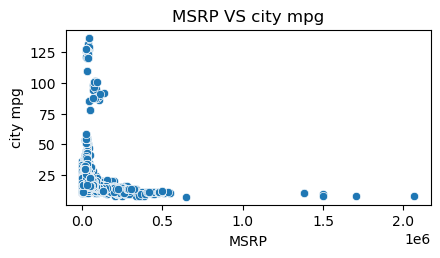

In [ ]:
# Visualization
plt.figure(figsize=(16, 5))

# Weight vs Height Scatter Plot
plt.subplot(2, 3, 4)
sns.scatterplot(x='MSRP', y='city mpg', data=df)
plt.title('MSRP VS city mpg')

# Show the Plot
plt.show()

**Insight**

- Kebanyakan mobil yang digunakan didalam kota dibawah 0,5 dengan city mpg melebihii 125. pada MSRP terdapat beberapa outlier yang MSRP nya lebih tinggi dari yang lainnya.

Text(0.5, 1.0, 'MSRP VS Year')

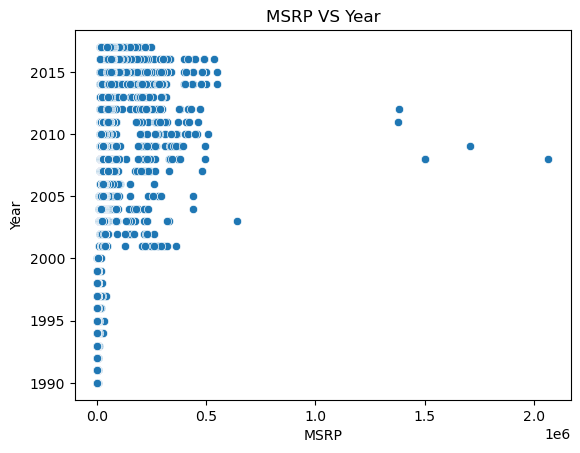

In [ ]:
#Scatterplot 

sns.scatterplot(data=df,x='MSRP', y='Year')
plt.title('MSRP VS Year')

**Insight**

- Dari seluruh total seluruh tahun, di antara tahun 2005 - 2015 terdapat harga yang lebih tinggi dari lainnya, dan pada tahun 2008, terdapat  outlier, dimana harga tertinggi dari tahun lainnya

In [ ]:
size = df['Vehicle Size'].value_counts()
size


Compact    4764
Midsize    4373
Large      2777
Name: Vehicle Size, dtype: int64

<Axes: >

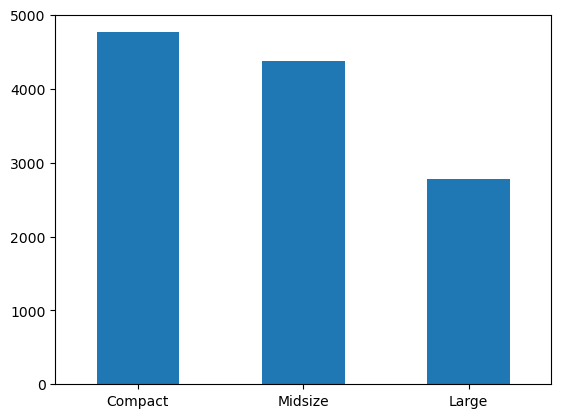

In [ ]:
size.plot(kind='bar', rot=0)

- Pada bar, diantara 3 size pada large tidak mencapai angka +4000 seperti 2 size lainnya 

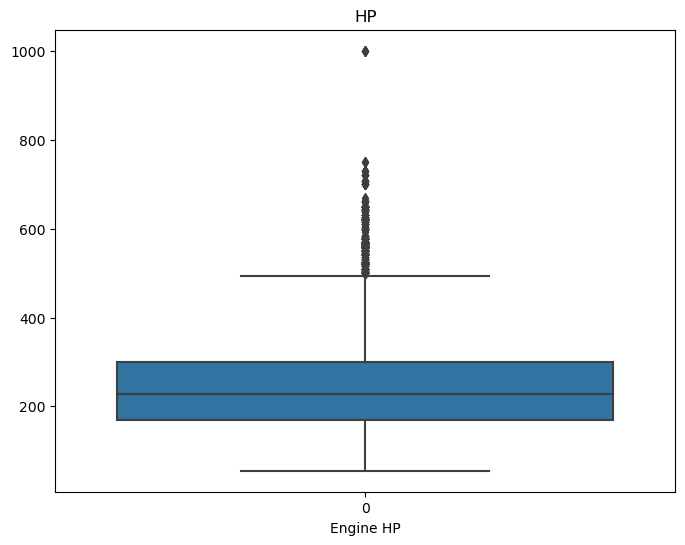

In [ ]:
# Box plot untuk melihat adanya outlier
plt.figure(figsize=(8, 6))
sns.boxplot(df['Engine HP'])
plt.title('HP')
plt.xlabel('Engine HP')
plt.show()

**Insight**
Dari box plot, dapat dilihat adanya beberapa outlier di bagian atas tanduk. Outlier ini menunjukkan adanya beberapa yang memiliki tenaga tinggi dan satu yang memiliki tenaga lebih tinggi dari  lainnya.

Text(0.5, 1.0, 'mpg')

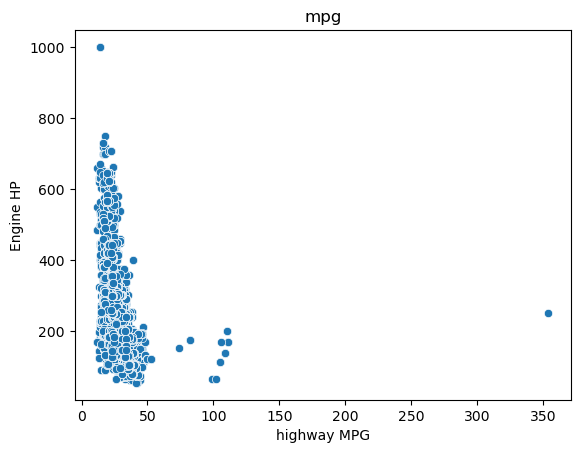

In [ ]:
#Scatterplot between Size and Rent

sns.scatterplot(data=df,x='highway MPG', y='Engine HP')
plt.title('mpg')

**Insight**

- Plot banyak berkumpul di bawah 50 pada highway dan dibawah 800 di engine,Ada beberapa yang lebih tinggi dari yang lainnya, berada dia 50-105. Teradapat 2 outlier yang menghabiskan mpg hingga 350, dan ada scatter yang memiliki tenaga yang besar tapi menghabiskan mpg sangat kecil.

# Feature Engineering

## Handling Cardinality 

In [ ]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Make,48,"[BMW, Audi, FIAT, Mercedes-Benz, Chrysler, Nissan, Volvo, Mazda, Mitsubishi, Ferrari, Alfa Romeo, Toyota, McLaren, Maybach, Pontiac, Porsche, Saab, GMC, Hyundai, Plymouth, Honda, Oldsmobile, Suzuki, Ford, Cadillac, Kia, Bentley, Chevrolet, Dodge, Lamborghini, Lincoln, Subaru, Volkswagen, Spyker, Buick, Acura, Rolls-Royce, Maserati, Lexus, Aston Martin, Land Rover, Lotus, Infiniti, Scion, Genesis, HUMMER, Tesla, Bugatti]"
1,Model,915,"[1 Series M, 1 Series, 100, 124 Spider, 190-Class, 2 Series, 200, 200SX, 240SX, 240, 2, 3 Series Gran Turismo, 3 Series, 300-Class, 3000GT, 300, 300M, 300ZX, 323, 350-Class, 350Z, 360, 370Z, 3, 4 Series Gran Coupe, 4 Series, 400-Class, 420-Class, 456M, 458 Italia, 4C, 4Runner, 5 Series Gran Turismo, 5 Series, 500-Class, 500e, 500, 500L, 500X, 550, 560-Class, 570S, 575M, 57, 599, 5, 6 Series Gran Coupe, 6 Series, 600-Class, 6000, 612 Scaglietti, 626, 62, 650S Coupe, 650S Spider, 6, 7 Series, 718 Cayman, 740, 760, 780, 8 Series, 80, 850, 86, 9-2X, 9-3 Griffin, 9-3, 9-4X, 9-5, 9-7X, 9000, 900, 90, 911, 928, 929, 940, 944, 960, 968, A3, A4 allroad, A4, A5, A6, A7, A8, Acadia Limited, Acadia, Accent, Acclaim, Accord Crosstour, Accord Hybrid, Accord Plug-In Hybrid, Accord, Achieva, ActiveHybrid 5, ActiveHybrid 7, ActiveHybrid X6, ...]"
2,Engine Fuel Type,10,"[premium unleaded (required), regular unleaded, premium unleaded (recommended), flex-fuel (unleaded/E85), diesel, electric, flex-fuel (premium unleaded recommended/E85), natural gas, flex-fuel (premium unleaded required/E85), flex-fuel (unleaded/natural gas), nan]"
3,Transmission Type,5,"[MANUAL, AUTOMATIC, AUTOMATED_MANUAL, DIRECT_DRIVE, UNKNOWN]"
4,Driven_Wheels,4,"[rear wheel drive, front wheel drive, all wheel drive, four wheel drive]"
5,Market Category,71,"[Factory Tuner,Luxury,High-Performance, Luxury,Performance, Luxury,High-Performance, Luxury, Performance, Flex Fuel, Flex Fuel,Performance, nan, Hatchback, Hatchback,Luxury,Performance, Hatchback,Luxury, Luxury,High-Performance,Hybrid, Diesel,Luxury, Hatchback,Performance, Hatchback,Factory Tuner,Performance, High-Performance, Factory Tuner,High-Performance, Exotic,High-Performance, Exotic,Factory Tuner,High-Performance, Factory Tuner,Performance, Crossover, Exotic,Luxury, Exotic,Luxury,High-Performance, Exotic,Luxury,Performance, Factory Tuner,Luxury,Performance, Flex Fuel,Luxury, Crossover,Luxury, Hatchback,Factory Tuner,Luxury,Performance, Crossover,Hatchback, Hybrid, Luxury,Performance,Hybrid, Crossover,Luxury,Performance,Hybrid, Crossover,Luxury,Performance, Exotic,Factory Tuner,Luxury,High-Performance, Flex Fuel,Luxury,High-Performance, Crossover,Flex Fuel, Diesel, Hatchback,Diesel, Crossover,Luxury,Diesel, Crossover,Luxury,High-Performance, Exotic,Flex Fuel,Factory Tuner,Luxury,High-Performance, Exotic,Flex Fuel,Luxury,High-Performance, Exotic,Factory Tuner,Luxury,Performance, Hatchback,Hybrid, Crossover,Hybrid, Hatchback,Luxury,Hybrid, Flex Fuel,Luxury,Performance, Crossover,Performance, Luxury,Hybrid, Crossover,Flex Fuel,Luxury,Performance, Crossover,Flex Fuel,Luxury, Crossover,Flex Fuel,Performance, Hatchback,Factory Tuner,High-Performance, Hatchback,Flex Fuel, Factory Tuner,Luxury, Crossover,Factory Tuner,Luxury,High-Performance, Crossover,Factory Tuner,Luxury,Performance, Crossover,Hatchback,Factory Tuner,Performance, Crossover,Hatchback,Performance, Flex Fuel,Hybrid, Flex Fuel,Performance,Hybrid, Crossover,Exotic,Luxury,High-Performance, Crossover,Exotic,Luxury,Performance, Exotic,Performance, Exotic,Luxury,High-Performance,Hybrid, Crossover,Luxury,Hybrid, Flex Fuel,Factory Tuner,Luxury,High-Performance, Performance,Hybrid, Crossover,Factory Tuner,Performance, Crossover,Diesel, Flex Fuel,Diesel, Crossover,Hatchback,Luxury]"
6,Vehicle Size,3,"[Compact, Midsize, Large]"
7,Vehicle Style,16,"[Coupe, Convertible, Sedan, Wagon, 4dr Hatchback, 2dr Hatchback, 4dr SUV, Passenger Minivan, Cargo Minivan, Crew Cab Pickup, Regular Cab Pi

**Insight**

- Terdapat kolom yang high cardinality, dan akan dilakukan drop 

## Handling Drop Column

In [ ]:
# Misalnya Anda ingin menjatuhkan kolom
df.drop(columns=['Model'], inplace=True)
df.drop(columns=['Market Category'], inplace=True)
df.drop(columns=['Make'], inplace=True)

## Duplicated Engineering

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.duplicated().sum()

0

**Insight**

- Terdapat 715 duplicat, olehkarna itu akan dilakukan drop duplicate untuke melanjutakn ke tahap berikutnya

## Splitting between X dan y

In [ ]:
#Splitting between 'X' and 'y'

X = df.drop(columns=['MSRP'], axis = 1)           # Feature
y = df['MSRP']                                                     # Label

**Insight**

- Dilakukan split dimana MSRP dipisahkan menjadi Y, yang nanti nya akan di jadikan target

## Splitting between X(feature) and y(target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (8948, 12)
Test Size:  (2237, 12)


**Insight**

- Sebelum dilakukan tuning, model berbentuk uderfit

In [ ]:
df.columns

Index(['Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size',
       'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

## Outlier

In [ ]:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Year,-1.255011
1,Engine HP,1.283253
2,Engine Cylinders,0.962349
3,Number of Doors,-1.024959
4,highway MPG,4.111944
5,city mpg,7.069336
6,Popularity,1.632181


In [ ]:
# Your code continues here
winsoriser = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['Year','Engine HP', 'Engine Cylinders',  'Number of Doors', 'highway MPG', 'city mpg' ],
                        missing_values= 'ignore')

x_train = winsoriser.fit_transform(X_train)
x_test = winsoriser.transform(X_test)


In [ ]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Year - Before Capping


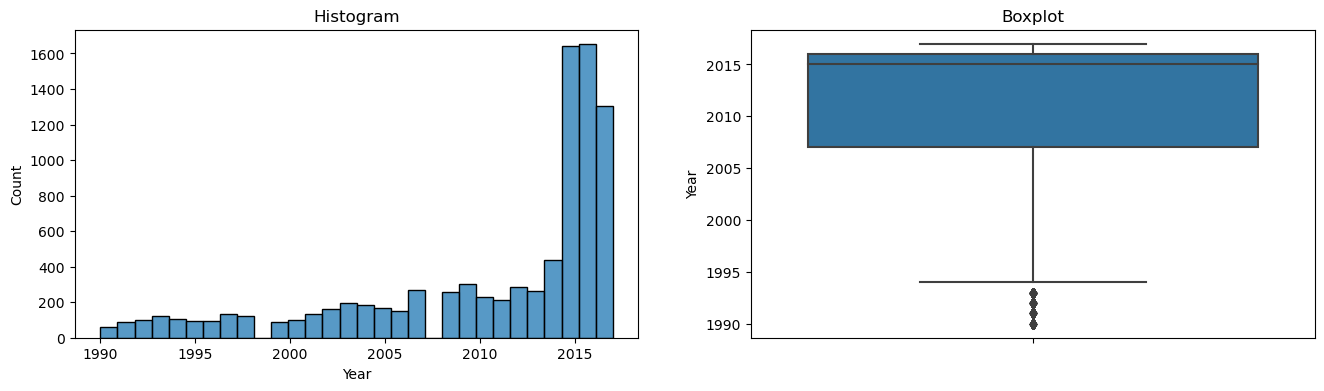


Year - After Capping


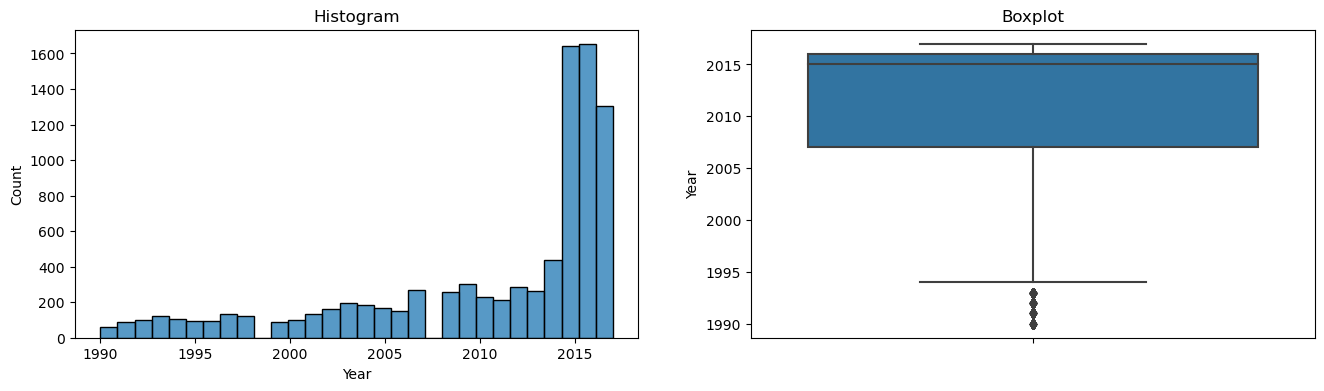

Engine HP - Before Capping


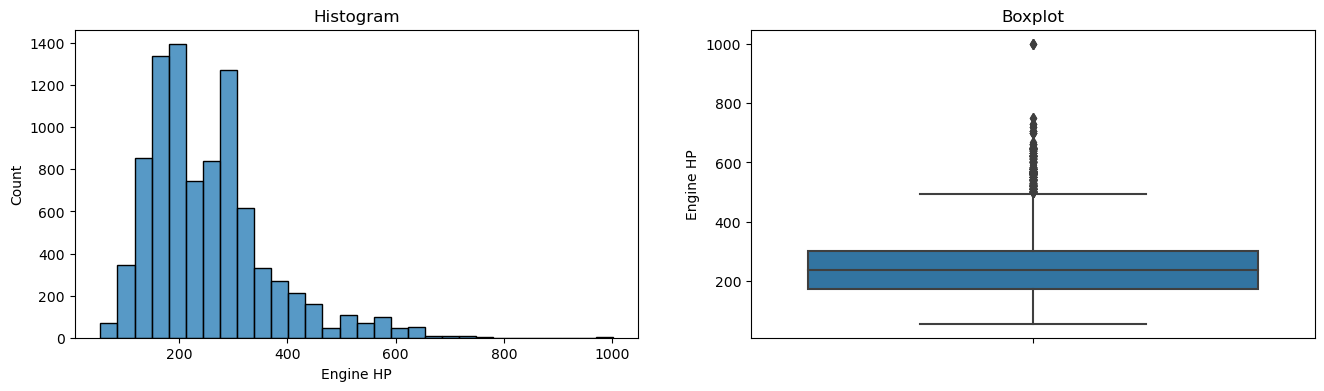


Engine HP - After Capping


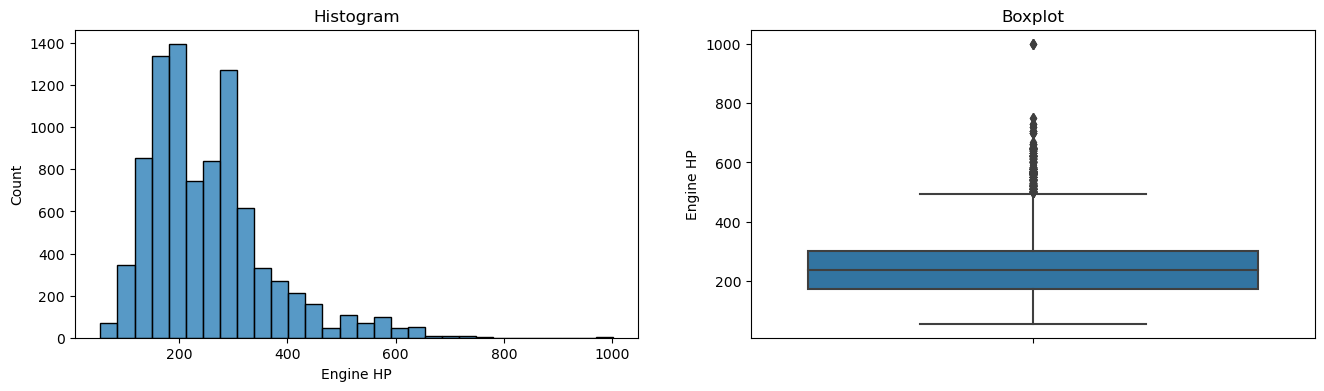

Engine Cylinders - Before Capping


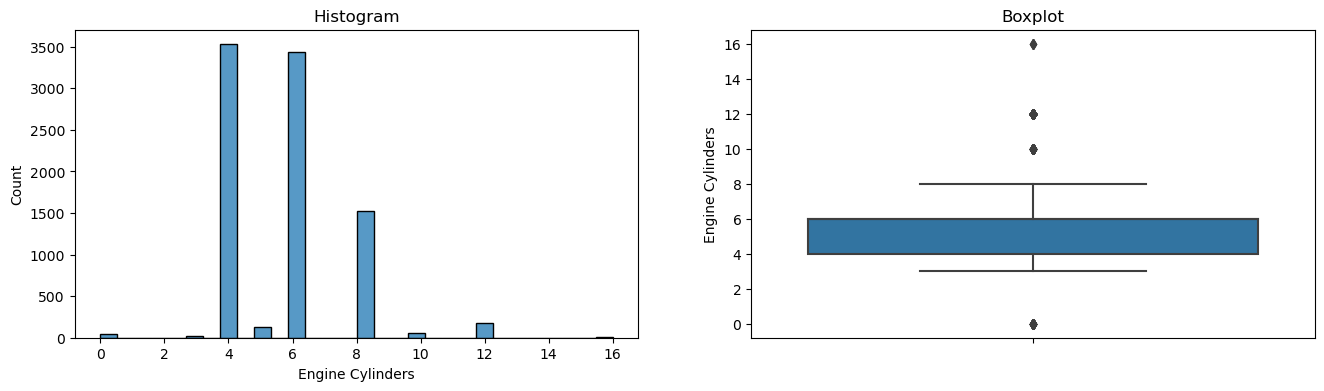


Engine Cylinders - After Capping


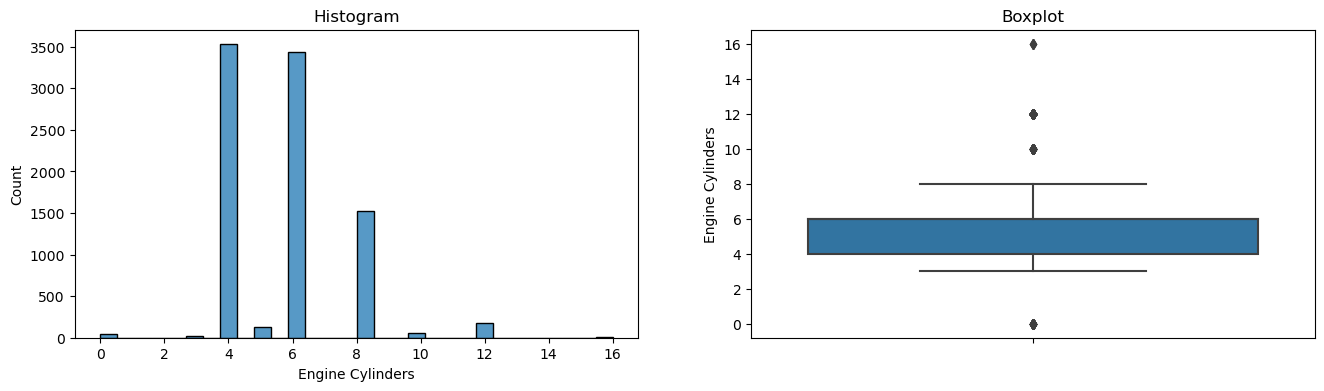

Number of Doors - Before Capping


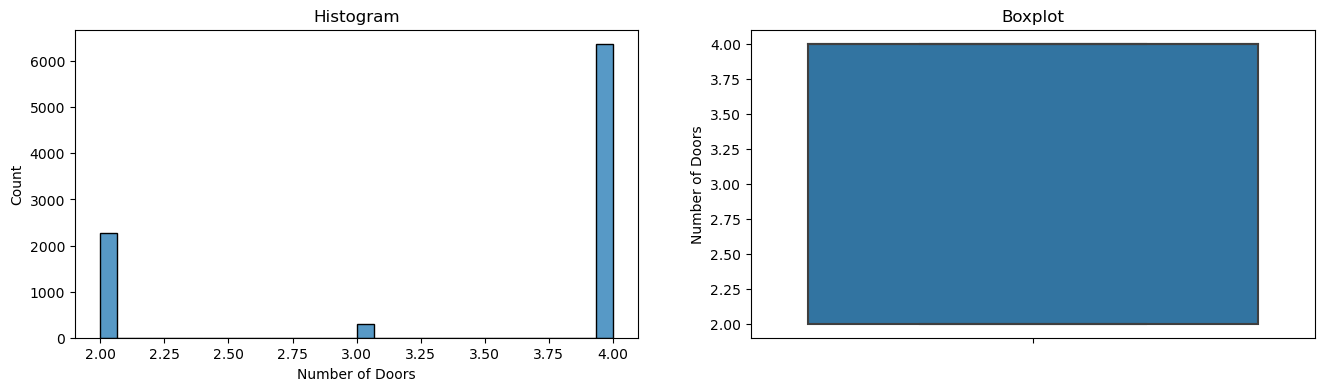


Number of Doors - After Capping


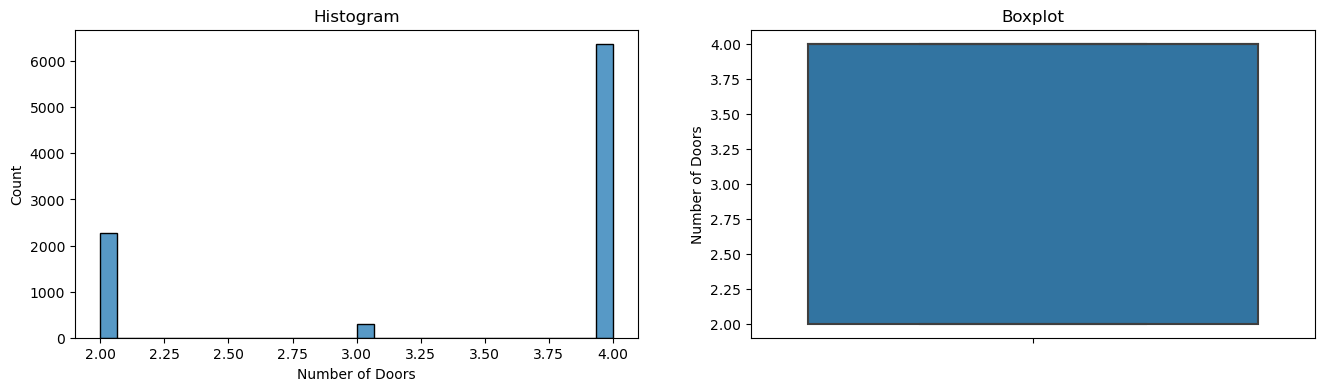

highway MPG - Before Capping


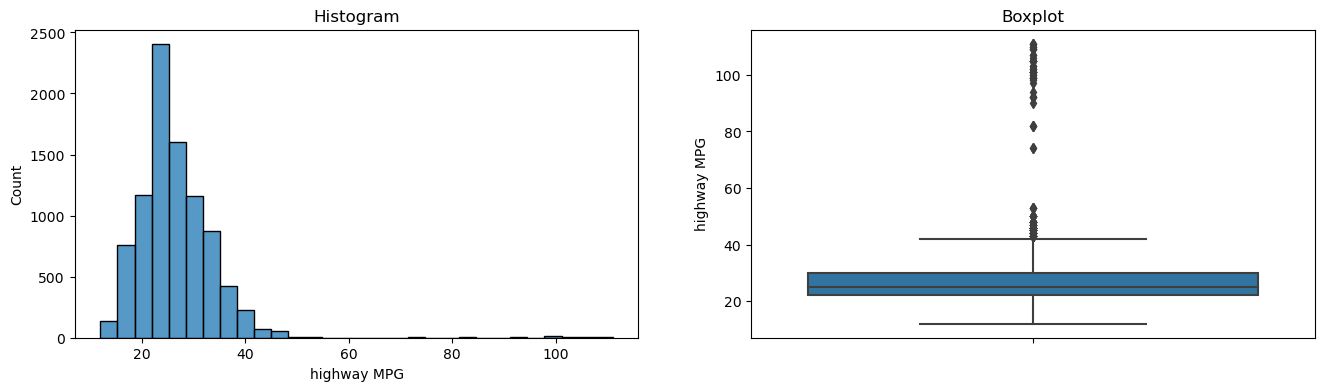


highway MPG - After Capping


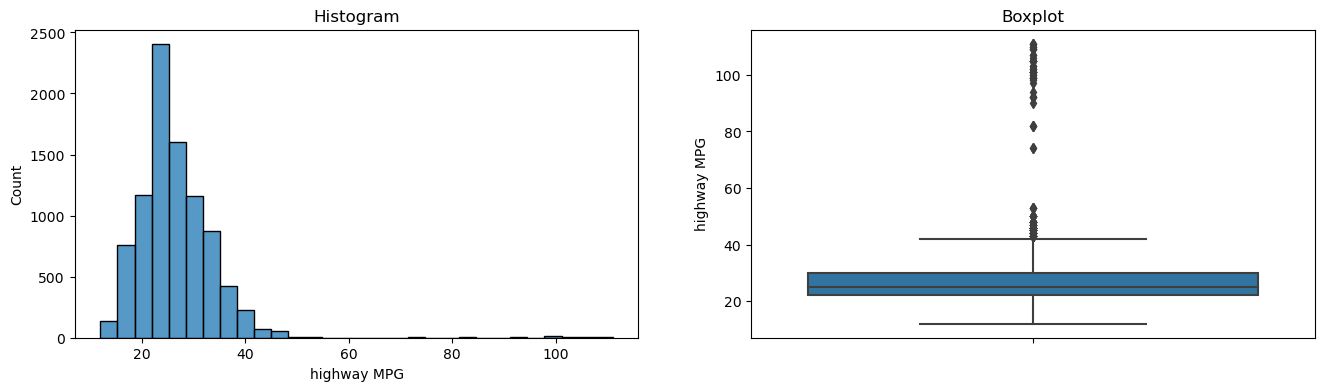

city mpg - Before Capping


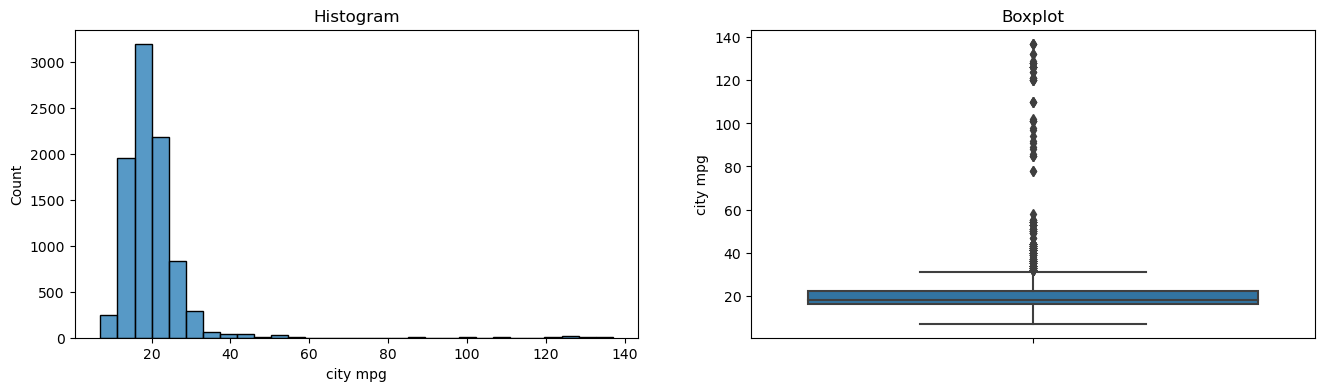


city mpg - After Capping


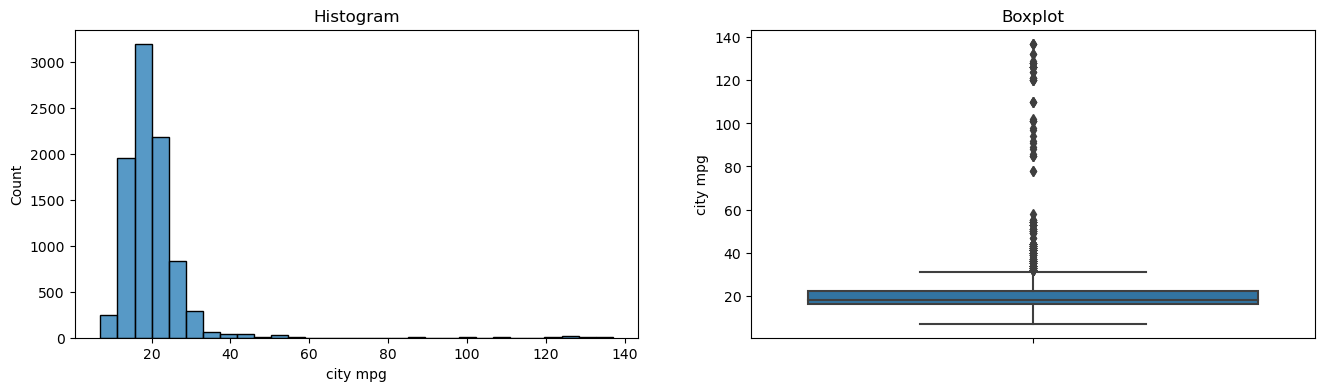

Popularity - Before Capping


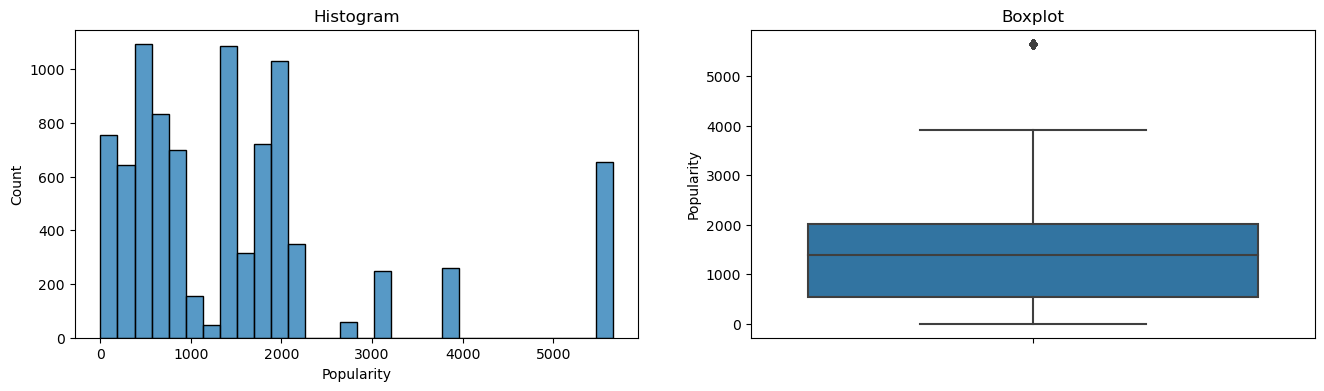


Popularity - After Capping


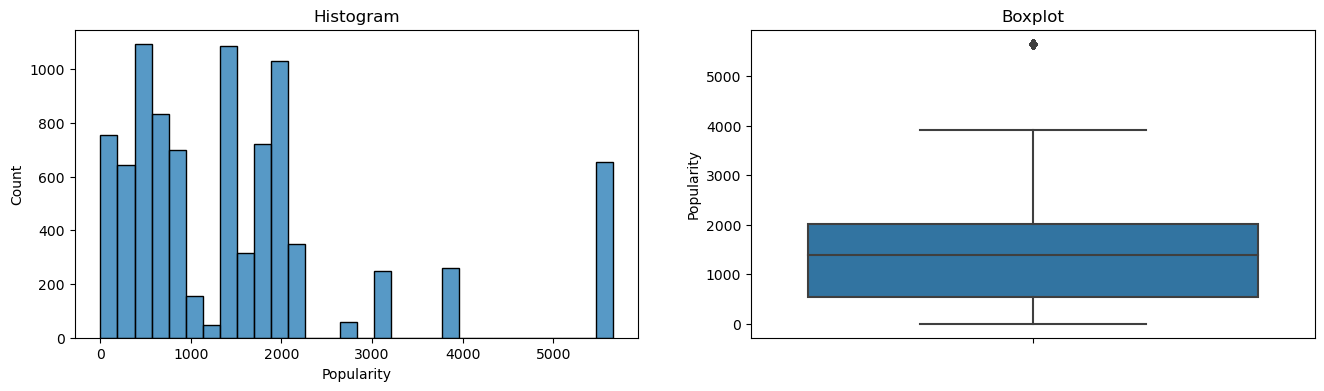

In [ ]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train, col)

## Missing Value 

In [ ]:
X_test.isnull().sum()

Year                  0
Engine Fuel Type      2
Engine HP            17
Engine Cylinders     10
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
dtype: int64

In [ ]:
X_train.isnull().sum()

Year                  0
Engine Fuel Type      1
Engine HP            52
Engine Cylinders     20
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
dtype: int64

In [ ]:
y_test.isnull().sum()

0

In [ ]:
y_train.isnull().sum()

0

In [ ]:
X_train.dropna(inplace=True)

In [ ]:
X_test.dropna(inplace=True)

In [ ]:
y_train.dropna(inplace=True)

In [ ]:
y_test.dropna(inplace=True)

### After Handling

In [ ]:
X_train.isnull().sum()

Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
dtype: int64

In [ ]:
X_test.isnull().sum()

Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
dtype: int64

## Feature Selction

In [ ]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()   
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
Categorical Columns:  ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']


In [ ]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]                            

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]



In [ ]:
# Periksa panjang X_train dan y_train
print("Panjang X_train_num:", len(X_train_num))
print("Panjang y_train:", len(y_train))


Panjang X_train_num: 8875
Panjang y_train: 8948


In [ ]:
# Buat y_train sama x_train
y_train = y_train.loc[X_train_num.index]
y_test = y_test.loc[X_test_num.index]

X_train_num


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
6914,2017,245.0,4.0,4.0,28,20,61
8349,2010,207.0,6.0,2.0,21,15,5657
11300,2011,260.0,6.0,4.0,22,17,1439
7352,2015,148.0,4.0,4.0,30,24,436
4852,2017,250.0,4.0,4.0,27,23,640
...,...,...,...,...,...,...,...
8363,2011,207.0,6.0,4.0,19,15,5657
3823,1997,205.0,6.0,4.0,26,17,26
6314,2017,310.0,6.0,4.0,31,21,155
5716,2010,155.0,4.0,4.0,32,22,1385


In [ ]:
# Feature selection 
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = kendalltau(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Year,ada korelasi
1,Engine HP,ada korelasi
2,Engine Cylinders,ada korelasi
3,Number of Doors,ada korelasi
4,highway MPG,ada korelasi
5,city mpg,ada korelasi
6,Popularity,ga ada korelasi


**Insight**

Melakukan pengecekan nilai skewness pada kolom numerical dan ditemukan semua kolom numerikal bersifat skew atau tidak terdistribusi normal

In [ ]:
num_cols_new = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg']

In [ ]:
# Feature selection 
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Engine Fuel Type,ada korelasi
1,Transmission Type,ada korelasi
2,Driven_Wheels,ada korelasi
3,Vehicle Size,ada korelasi
4,Vehicle Style,ada korelasi


**Insight** 

Melakukan pengecekan nilai skewness pada kolom cadan ditemukan semua kolom numerikal bersifat skew atau tidak terdistribusi normal

In [ ]:
cat_cols_new = ['Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels','Vehicle Size', 'Vehicle Style']

In [ ]:
# Assign variable untuk mengelompokkan data train dan data test dengan kolom yang sudah di feature selection
X_train_cat = x_train[cat_cols_new]
X_train_num = x_train[num_cols_new]

X_test_cat = x_test[cat_cols_new]
X_test_num = x_test[num_cols_new]

# Modelling

In [ ]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), selector(dtype_exclude='object')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'), selector(dtype_include='object'))
])


#Making pipeline for XGBoost
pipe_gb = Pipeline([
('transformer', transformer),
('classifier', XGBRegressor())
])

#Making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsRegressor())
])


#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestRegressor())
])


#Making pipeline for SVM
pipe_svr = Pipeline([
('transformer', transformer),
('classifier', SVR())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeRegressor())
])

## SVR

In [ ]:
pipe_svr.fit(X_train, y_train)
print('Training Score: ',round(pipe_svr.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svr.score(X_test, y_test),4))

Training Score:  -0.027
Testing Score:  -0.0454


In [ ]:
y_svr_pred = pipe_svr.predict(X_test)
y_svr_pred

array([30771.5477299 , 30945.85350621, 29870.94767995, ...,
       29706.53998012, 30025.95739181, 30512.88827931])

In [ ]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_svm
nilai_terkecil = np.min(y_svr_pred)
nilai_terbesar = np.max(y_svr_pred)

print("Nilai min:", nilai_terkecil)
print("Nilai max:", nilai_terbesar)

Nilai min: 29568.520018963252
Nilai max: 31306.797740630376


In [ ]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [0.89571314 0.80047281 0.78028012]
R-squared Score - Mean - Cross Validation :  0.8254886916562193
R-squared Score - Std - Cross Validation  :  0.050335812691816195
R-squared Score - Range of Test-Set       :  0.7751528789644031 - 0.8758245043480355


## KNN

In [ ]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.9048
Testing Score:  0.9427


In [ ]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([ 66580., 218196.,  19236., ...,   2000.,  22027.,  50225.])

In [ ]:
# Evaluasi performa model
nilai_terkecil = np.min(y_knn_pred)
nilai_terbesar = np.max(y_knn_pred)


# Menampilkan hasil evaluasi
print("Nilai min:", nilai_terkecil)
print("Nilai max:", nilai_terbesar)

Nilai min: 2000.0
Nilai max: 466830.0


In [ ]:
from sklearn.metrics import make_scorer, r2_score

# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [0.89571314 0.80047281 0.78028012]
R-squared Score - Mean - Cross Validation :  0.8254886916562193
R-squared Score - Std - Cross Validation  :  0.050335812691816195
R-squared Score - Range of Test-Set       :  0.7751528789644031 - 0.8758245043480355


## Random Forest

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.9821
Testing Score:  0.9692


In [ ]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([ 49104.35      , 192311.87      ,  15421.82619048, ...,
         2000.        ,  30601.73048701,  55971.97380952])

In [ ]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_rf
nilai_terkecil = np.min(y_rf_pred)
nilai_terbesar = np.max(y_rf_pred)

print("Nilai min:", nilai_terkecil)
print("Nilai max:", nilai_terbesar)

Nilai min: 2000.0
Nilai max: 491490.925


In [ ]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [0.95834445 0.90430887 0.85161419]
R-squared Score - Mean - Cross Validation :  0.9047558363525031
R-squared Score - Std - Cross Validation  :  0.04357359120490331
R-squared Score - Range of Test-Set       :  0.8611822451475998 - 0.9483294275574065


## Decision Tree

In [ ]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9939
Testing Score:  0.9565


In [ ]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([ 50150., 147300.,  15195., ...,   2000.,  31250.,  56750.])

In [ ]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_dt
nilai_terkecil = np.min(y_dt_pred)
nilai_terbesar = np.max(y_dt_pred)

print("Nilai min:", nilai_terkecil)
print("Nilai max:", nilai_terbesar)

Nilai min: 2000.0
Nilai max: 497650.0


In [ ]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [0.93925052 0.88814242 0.84979635]
R-squared Score - Mean - Cross Validation :  0.8923964332920038
R-squared Score - Std - Cross Validation  :  0.03664318515085883
R-squared Score - Range of Test-Set       :  0.855753248141145 - 0.9290396184428626


## XGboost

In [ ]:
pipe_gb.fit(X_train, y_train)
print('Training Score: ',round(pipe_gb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_gb.score(X_test, y_test),4))

Training Score:  0.9921
Testing Score:  0.9654


In [ ]:
y_gb_pred = pipe_gb.predict(X_test)
y_gb_pred

array([ 50216.3  , 181134.58 ,  15298.57 , ...,   2060.954,  30811.97 ,
        47946.832], dtype=float32)

In [ ]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_dt
nilai_terkecil = np.min(y_gb_pred)
nilai_terbesar = np.max(y_gb_pred)

print("Nilai min:", nilai_terkecil)
print("Nilai max:", nilai_terbesar)

Nilai min: 110.97744
Nilai max: 483824.25


In [ ]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_gb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [0.93506407 0.88916193 0.88400515]
R-squared Score - Mean - Cross Validation :  0.9027437139395472
R-squared Score - Std - Cross Validation  :  0.022950700573431553
R-squared Score - Range of Test-Set       :  0.8797930133661157 - 0.9256944145129787


# Based Optimazation

In [ ]:
models = {
    'XGboost' : pipe_gb,
    'SVM' : pipe_svr,
    'Random Forest' : pipe_rf,
    'KNN' : pipe_knn,
    'Descision': pipe_dt
}

# Define the metrics
metrics = {
    'Root Mean Squared Error': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R2 Score': r2_score,
}

# Initialize the DataFrame to store the results
df_model = pd.DataFrame(columns=models.keys(), index=metrics.keys())

# Calculate the metrics for each model
for metric_name, metric_func in metrics.items():
    for model_name, model in models.items():
        # Calculate the metric
        df_model.loc[metric_name, model_name] = metric_func(y_test, model.predict(X_test))

# Display the results
df_model

,XGboost,SVM,Random Forest,KNN,Descision
Root Mean Squared Error,9205.248813,50580.280636,8677.021604,11845.595168,10312.400858
R2 Score,0.965374,-0.045436,0.969234,0.942661,0.956544


In [ ]:
# Hitung MSE untuk data pelatihan
train_mse = mean_squared_error(y_train, model.predict(X_train))

# Hitung MSE untuk data uji
test_mse = mean_squared_error(y_test, model.predict(X_test))

# Hitung RMSE untuk data pelatihan
train_rmse = np.sqrt(train_mse)

# Hitung RMSE untuk data uji
test_rmse = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 5023.144701469018
Test RMSE: 10312.400857745344


# Model Opmitization

In [ ]:
##Parameter Tuning

param_rf = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__n_estimators' : np.arange(200,401, 100),
    'classifier__max_depth' : np.arange(4,8,2)
}

# Model Optimization Evaluation

### Random Forest Regres

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring = 'neg_root_mean_squared_error').fit(X_train, y_train)


In [ ]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  -14260.14322482069
Test Set Score :  -14345.589812684626


In [ ]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)
# Evaluate the best model
r2_score_best = best_pipe_rf.score(X_test, y_test)
print("R2 Score of Best Random Forest Model:", r2_score_best)


{'classifier__max_depth': 6, 'classifier__n_estimators': 400, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FE21A46830>),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FE21A44610>)])),
                ('classifier',
                 RandomForestRegressor(max_depth=6, n_estimators=400))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 

In [ ]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  -14260.14322482069
Test Set Score :  -14345.589812684626


## Model After Tuning Comparison

In [ ]:
models = {
    'Random Forest' : best_pipe_rf
}

metrics = {
    'Root Mean Squared Error' : lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R2 Score' : r2_score,
}

df_model_tuning = pd.DataFrame(columns=models.keys(), index=metrics.keys())

for metric_name, metric_func in metrics.items():
    for model_name, model in models.items():
        df_model_tuning.loc[metric_name, model_name] = metric_func(y_test, model.predict(X_test))

df_model_tuning

,Random Forest
Root Mean Squared Error,14345.589813
R2 Score,0.915905


# Saving

In [ ]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols_new, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
 json.dump(num_cols_new, file_2)

with open('model.pkl', 'wb') as file_3:
  pickle.dump(best_pipe_rf, file_3)

# Kesimpulan

- Dari 5 model yang dijalan kan, model yang menjadi yang terbaik adalah Random Forest, karna diatara yang lain, train dan test nya memiliki selisih paling kcil, yang berarti goodfit, dan nilai cross validtion r2-score, memiliki nilai positif.
- Dari model inferensi, semakin tinggi nilai 'Engine HP', maka nilai predict juga juga semakin naik
- Dari model inferensi, semakin tinggi nilai 'Engine Fuel Type', maka nilai predict juga juga semakin naik
- Data yang didapatkan banyak data yang unknown dan data masih banyak data yang kotor.


# Conceptual

- Jelaskan latar belakang adanya bagging dan cara kerja bagging !
Bagging, singkatan dari Bootstrap Aggregating, adalah teknik ensemble learning yang digunakan untuk meningkatkan kinerja model prediktif dengan menggabungkan prediksi dari beberapa model yang dilatih pada sampel data yang diambil secara acak dari set data pelatihan yang tersedia. Tujuan utamanya adalah untuk mengurangi varians model, yang sering terjadi saat model terlalu kompleks atau cenderung overfitting. Bagging bekerja dengan cara menghasilkan beberapa sampel data yang berbeda dari set data pelatihan menggunakan proses bootstrapping (pengambilan sampel dengan pengembalian). Kemudian, model pembelajaran (misalnya, decision tree) dilatih pada setiap sampel data, dan prediksi dari setiap model dijumlahkan atau diambil rata-ratanya untuk menghasilkan prediksi akhir. Dengan cara ini, bagging menghasilkan model yang lebih stabil dan lebih umumnya memiliki kinerja yang lebih baik daripada model tunggal.
- Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
Random Forest: Random Forest adalah algoritma ensemble learning yang menggunakan teknik bagging untuk membangun beberapa pohon keputusan pada set data yang berbeda. Setiap pohon keputusan dalam Random Forest dibangun secara independen dengan menggunakan subset acak dari fitur dan data pelatihan. Ketika membuat prediksi, Random Forest menggabungkan prediksi dari setiap pohon untuk menghasilkan prediksi akhir. Random Forest cenderung lebih cepat dalam pelatihan dan cocok untuk data berukuran besar.
Algoritma Boosting yang dipilih (misalnya, XGBoost atau Gradient Boosting Machines): Algoritma Boosting adalah teknik ensemble learning lainnya yang bekerja dengan cara menggabungkan beberapa model lemah (misalnya, decision tree sederhana) secara bertahap untuk memperbaiki kinerja model secara keseluruhan. Algoritma ini bekerja dengan cara menyesuaikan iteratif bobot dari sampel data, memberikan lebih banyak penekanan pada sampel yang sulit untuk diprediksi oleh model sebelumnya. Selama iterasi, model baru ditambahkan ke ensemble untuk memperbaiki kesalahan yang dilakukan oleh model sebelumnya. Algoritma Boosting cenderung menghasilkan model yang lebih kompleks dan memiliki kinerja yang lebih baik pada data yang sulit.
- Jelaskan apa yang dimaksud dengan Cross Validation !
Cross Validation adalah teknik yang digunakan untuk mengevaluasi kinerja model machine learning dengan membagi set data menjadi subset yang lebih kecil, disebut lipatan (folds), dan melakukan pelatihan serta pengujian pada berbagai kombinasi lipatan. Tujuannya adalah untuk mendapatkan perkiraan yang lebih dapat diandalkan tentang kinerja model di luar data pelatihan. Proses ini mengurangi risiko overfitting dan memungkinkan kita untuk mengukur seberapa baik model akan melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Cross Validation berguna terutama ketika kita memiliki set data yang relatif kecil atau ingin memastikan bahwa model kita tidak overfitting pada data pelatihan.







